In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def img_show(img):
    fig = plt.figure()
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
#     fig.savefig('test', bbox_inches='tight', pad_inches=0)
    plt.show()

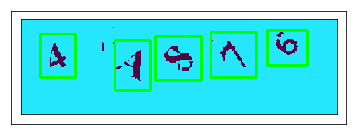

In [50]:

im = cv2.imread('datasets/test.png')
out = np.zeros(im.shape,np.uint8)
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)

im2,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    if (cv2.contourArea(cnt) < 1000) and (cv2.contourArea(cnt) > 100):
        [x,y,w,h] = cv2.boundingRect(cnt)
        if  h > 10:
            cv2.rectangle(im,(x-10,y-10),(x+w+10,y+h+10),(0,255,0),2)
            roi = thresh[y:y+h,x:x+w]
            roismall = cv2.resize(roi,(10,10))
            roismall = roismall.reshape((1,100))
            roismall = np.float32(roismall)
#             retval, results, neigh_resp, dists = model.find_nearest(roismall, k = 1)
#             string = str(int((results[0][0])))
#             cv2.putText(out,string,(x,y+h),0,1,(0,255,0))

img_show(im)

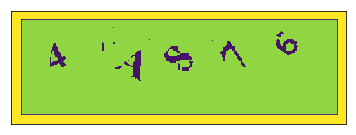

In [35]:
img_show(gray)